In [6]:
import numpy as np
%matplotlib inline
import matplotlib.pylab as plt
from lsst.daf.persistence import Butler
from lsst.afw.image import abMagFromFlux, fluxFromABMag
from lsst.afw.table import MultiMatch
from lsst.meas.astrom import DirectMatchTask
import lsst.daf.persistence as daf_persistence


In [7]:
# Stealing tbe butler code from HCS_colorcolor.ipynb
depth = 'DEEP' #use the DEEP catalog, got this file path from another notebook
butler = daf_persistence.Butler('/datasets/hsc/repo/rerun/DM-13666/%s/'%(depth))

In [8]:
tract = 10054
band = 'HSC-R'

In [17]:
patch = '0,0'
sources = butler.get('deepCoadd_meas', tract=tract, patch=patch, filter=band)

In [21]:
sources['coord_ra'], sources['coord_dec']

(array([2.61099674, 2.61092744, 2.61079699, ..., 2.61017199, 2.60958772,
        2.60959261]),
 array([0.05025443, 0.05025856, 0.05024888, ..., 0.05240874, 0.05283503,
        0.05283339]))

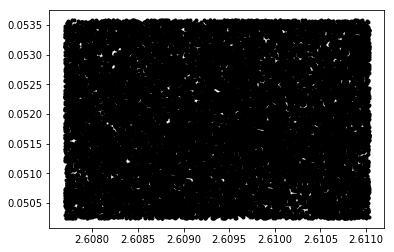

In [22]:
plt.plot(sources['coord_ra'], sources['coord_dec'], 'k.')

In [33]:
id_fmt = {'visit':np.int64}
matched_cat = MultiMatch(sources.schema, id_fmt)
matched_cat.add(sources, )

TypeError: 'int' object is not subscriptable

In [32]:
help(MultiMatch.add)

Help on function add in module lsst.afw.table.multiMatch:

add(self, catalog, dataId)
    Add a new catalog to the match, corresponding to the given data ID.



In [ ]:
# GAIA stuff in /project/shared/data/gaia_dr2
